### DATA VISUALIZATION - TRỰC QUAN HÓA DỮ LIỆU 
- Chuyển data thành biểu đồ
- Đưa ra những điểm qtrong và ko qtrong 
- 4 loại biểu đồ : Line chart (bdo đường), bar chart( bdo cột), pie chart (bdo bánh vẽ), scartter plot (bdo phân tán)
- line chart : sdung nếu data có datetime
- bar chart : so sánh cái nào lớn hơn cái nào (ko sdung bdo cột chồng vì ko có  2 đại lượng)
- pie chart ( cộng lại phải 100%)
- scartter plot ( name, sex, number) nhưng trong trường hợp này có thể sdung bar chart nhưng sdung scatter plot là tốt nhất cho trường hợp này
- Quy tắc : ko có quy tắc nào cả , chỉ là hợp lý hay ko hợp lý phụ thuộc vô data

- Doc ref : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html
 -matplotlib :
 + https://matplotlib.org/
               +https://www.w3schools.com/python/matplotlib_pyplot.asp
          


In [14]:
import pandas as pd
import os
import numpy as np

In [15]:
os.chdir(r'C:\Users\Admin\Pytraining')

In [31]:
df = pd.read_csv('yob2018.txt', sep = ',', names = ['Name', 'Sex', 'Number'])

In [32]:
df

,Name,Sex,Number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
...,...,...,...
32028,Zylas,M,5
32029,Zyran,M,5
32030,Zyrie,M,5
32031,Zyron,M,5


In [5]:
fm_df = pd.pivot_table(df, index='Sex', values ='Number',aggfunc =np.sum)
fm_df

,Number
Sex,
F,1686961
M,1800392


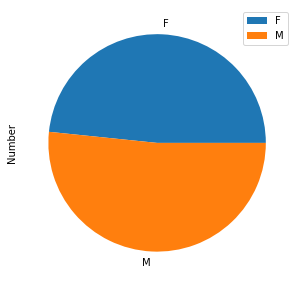

In [9]:
# sdung pie chart
pie = fm_df.plot.pie(y='Number',figsize = (5,5));
pie;

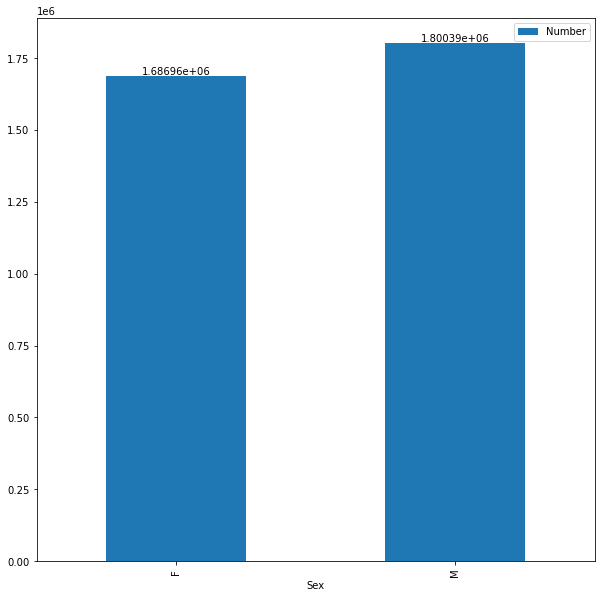

In [11]:
# sdung bar chart
bar = fm_df.plot.bar(y ='Number',figsize =(10,10));
bar.bar_label(bar.containers[0]);

In [25]:
alpha_list =[]
for n in df['Name']:
    alpha_list.append(n[0])
    
    
df['First_letter'] = alpha_list
df

,Name,Sex,Number,First_letter
0,Emma,F,18688,E
1,Olivia,F,17921,O
2,Ava,F,14924,A
3,Isabella,F,14464,I
4,Sophia,F,13928,S
...,...,...,...,...
32028,Zylas,M,5,Z
32029,Zyran,M,5,Z
32030,Zyrie,M,5,Z
32031,Zyron,M,5,Z


In [26]:
first_letter_pivot = pd.pivot_table(df, index ='First_letter',values ='Number',aggfunc =np.sum)
first_letter_pivot
first_letter_pivot = first_letter_pivot.reset_index()
first_letter_pivot

,First_letter,Number
0,A,477260
1,B,145911
2,C,232036
3,D,136790
4,E,265616
5,F,36747
6,G,100779
7,H,106622
8,I,78659
9,J,312052


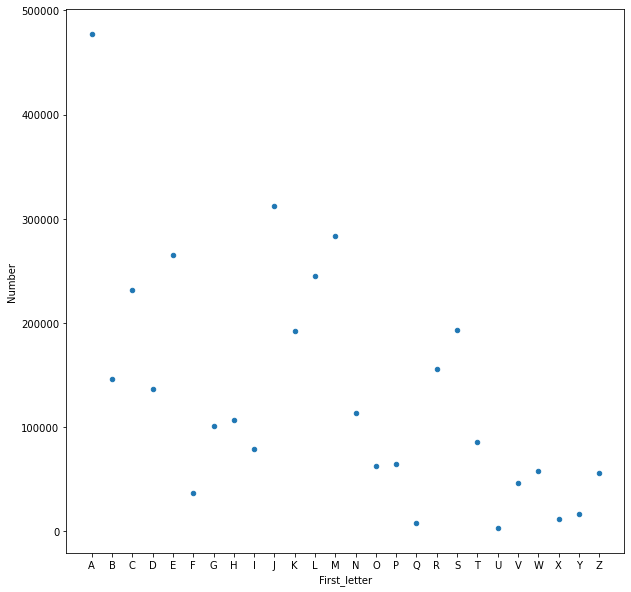

In [27]:
scatter = first_letter_pivot.plot.scatter(x='First_letter',y ='Number',figsize =(10,10))

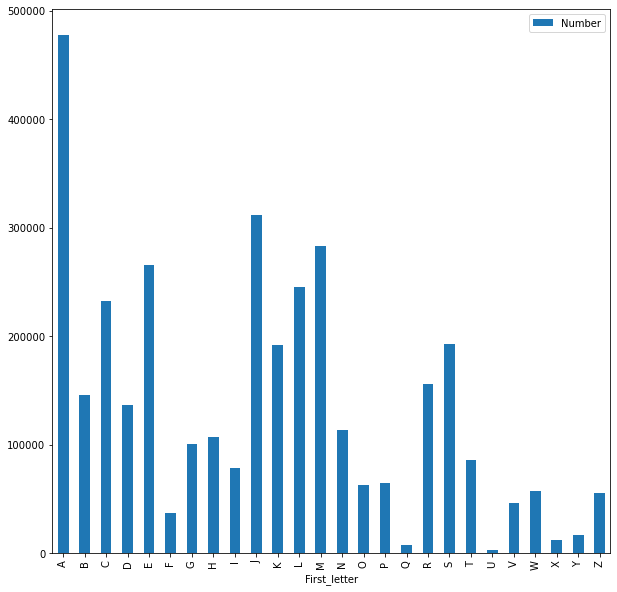

In [28]:
bar = first_letter_pivot.plot.bar(x = 'First_letter', y = 'Number',figsize =(10,10))

### DROP DUPLICATES ( subset, keep, inplace, ignore_index)
df.drop_duplicates (subset, keep, inplace, ignore_index)
- keep có 3 gtri ('first': default, 'last': giữ lại cuối bảng, 'None' " drop hết)

In [34]:
df

,Name,Sex,Number
0,Emma,F,18688
1,Olivia,F,17921
2,Ava,F,14924
3,Isabella,F,14464
4,Sophia,F,13928
...,...,...,...
32028,Zylas,M,5
32029,Zyran,M,5
32030,Zyrie,M,5
32031,Zyron,M,5


In [39]:
lesl_list = []
for n in df['Name']:
    if n[0:4] == 'Lesl':
        lesl_list.append(True)
    else:
        lesl_list.append(False)
        
df['Lesl_check'] = lesl_list
lesl_df = df[df['Lesl_check']== True]
lesl_df

,Name,Sex,Number,Lesl_check
519,Leslie,F,597,True
1222,Lesly,F,190,True
2780,Lesley,F,61,True
9460,Lesli,F,11,True
13158,Lesleigh,F,7,True
14799,Leslee,F,6,True
14800,Leslye,F,6,True
21152,Leslie,M,37,True


In [40]:
# trường hợp None
lesl_df.drop_duplicates(subset =['Name'], keep =False, ignore_index = True)

,Name,Sex,Number,Lesl_check
0,Lesly,F,190,True
1,Lesley,F,61,True
2,Lesli,F,11,True
3,Lesleigh,F,7,True
4,Leslee,F,6,True
5,Leslye,F,6,True


In [42]:
# trường hợp first 
lesl_df.drop_duplicates(subset =['Name'], keep ='first', ignore_index = True)

,Name,Sex,Number,Lesl_check
0,Leslie,F,597,True
1,Lesly,F,190,True
2,Lesley,F,61,True
3,Lesli,F,11,True
4,Lesleigh,F,7,True
5,Leslee,F,6,True
6,Leslye,F,6,True


In [43]:
# trường hợp last
lesl_df.drop_duplicates(subset =['Name'], keep ='last', ignore_index = True)

,Name,Sex,Number,Lesl_check
0,Lesly,F,190,True
1,Lesley,F,61,True
2,Lesli,F,11,True
3,Lesleigh,F,7,True
4,Leslee,F,6,True
5,Leslye,F,6,True
6,Leslie,M,37,True


In [44]:
# trường hợp xóa duplicates cột sex
lesl_df.drop_duplicates(subset =['Sex'], ignore_index = True)

,Name,Sex,Number,Lesl_check
0,Leslie,F,597,True
1,Leslie,M,37,True
